In [52]:
import pandas as pd

# Load the dataset
housing_data = pd.read_csv('Housing-project-train-data.csv')

# Data Understanding and Cleaning



In [53]:
housing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [54]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [55]:
# Check missing values percentage
missing_values = housing_data.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_values / len(housing_data)) * 100

# Display columns with missing values and their respective percentage
missing_percentage[missing_percentage > 0]


,0
PoolQC,99.400685
MiscFeature,96.232877
Alley,93.407534
Fence,79.708904
MasVnrType,60.188356
FireplaceQu,47.174658
LotFrontage,18.321918
GarageYrBlt,5.479452
GarageFinish,5.479452
GarageType,5.479452


In [56]:
threshold = 79
columns_to_drop = missing_percentage[missing_percentage > threshold].index.tolist()

# Drop the identified columns
housing_data.drop(columns=columns_to_drop, inplace=True)

# Verify the changes
missing_values = housing_data.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_values / len(housing_data)) * 100
missing_percentage[missing_percentage > 0]


,0
MasVnrType,60.188356
FireplaceQu,47.174658
LotFrontage,18.321918
GarageType,5.479452
GarageYrBlt,5.479452
GarageFinish,5.479452
GarageQual,5.479452
GarageCond,5.479452
BsmtFinType2,2.654110
BsmtExposure,2.654110


In [57]:
# Fill missing values in numerical columns with the median
numerical_cols = housing_data.select_dtypes(include=['number']).columns
for col in numerical_cols:
  if housing_data[col].isnull().any():
    housing_data.fillna({col:housing_data[col].mean()}, inplace=True)

# Fill missing values in categorical columns with the mode
categorical_cols = housing_data.select_dtypes(include=['object']).columns
for col in categorical_cols:
  if housing_data[col].isnull().any():
    housing_data.fillna({col:housing_data[col].mode()[0]}, inplace=True)

# Verify the changes
missing_values = housing_data.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_values / len(housing_data)) * 100
print(missing_percentage[missing_percentage > 0])


Series([], dtype: float64)


In [58]:
housing_data.isnull().sum().sum()

0

# Exploratory Data Analysis

Distribution of Sales

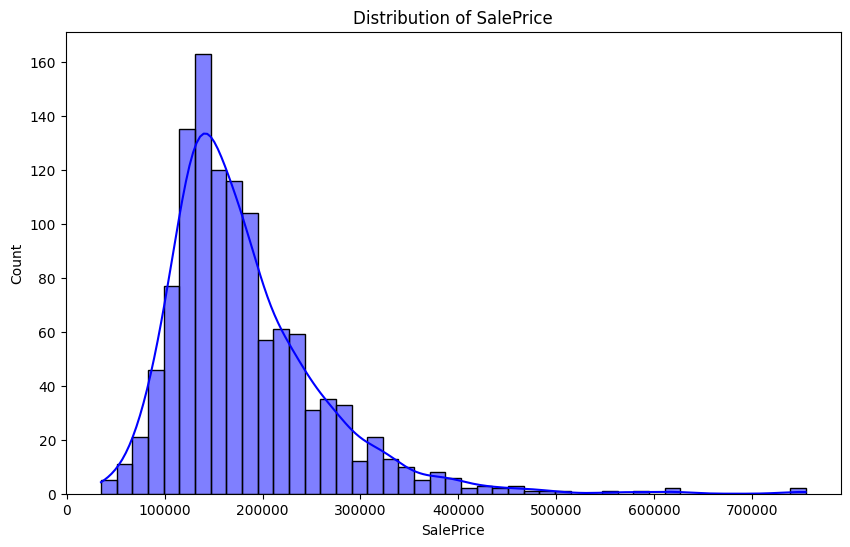

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution plot of SalePrice
plt.figure(figsize=(10, 6))
sns.histplot(housing_data['SalePrice'], kde=True, color='blue')
plt.title('Distribution of SalePrice')
plt.show()


Numerical features vs Sales

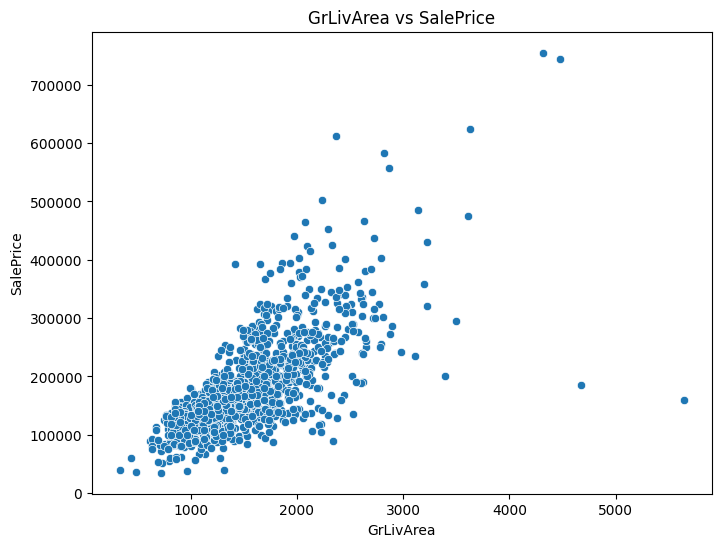

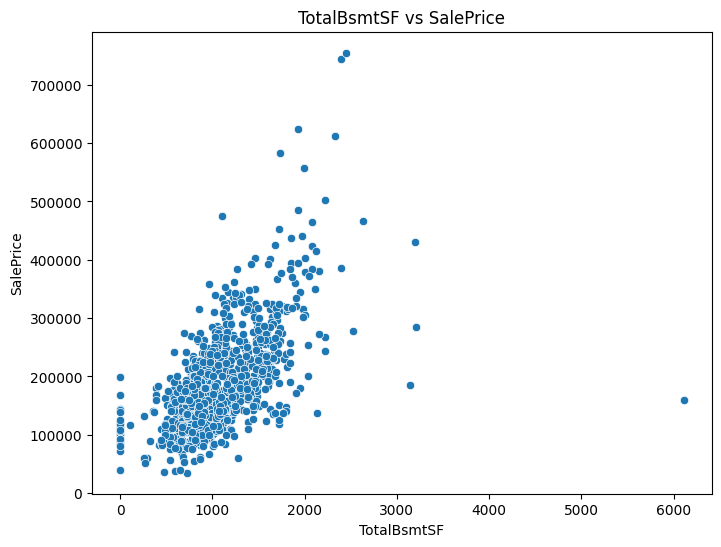

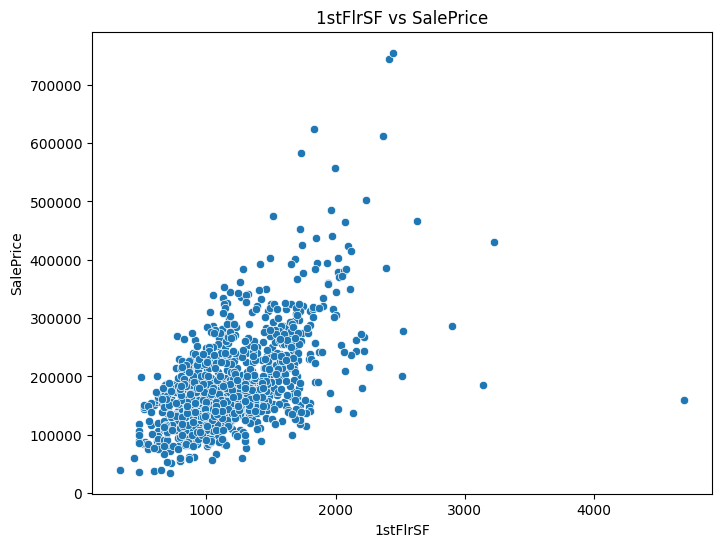

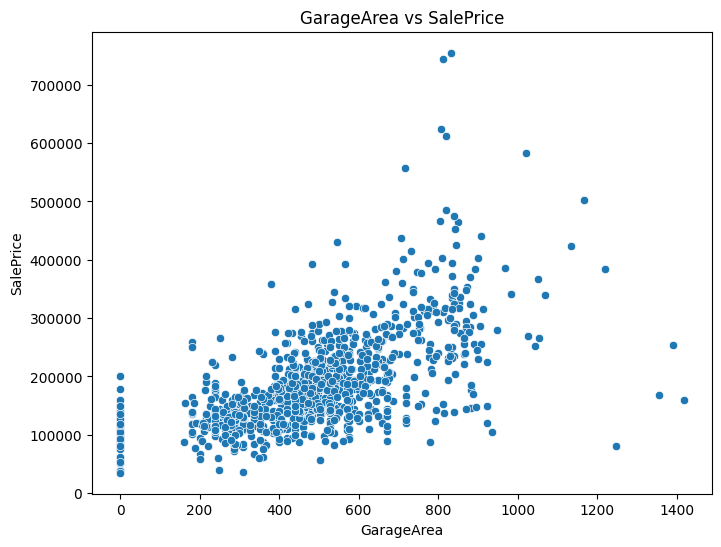

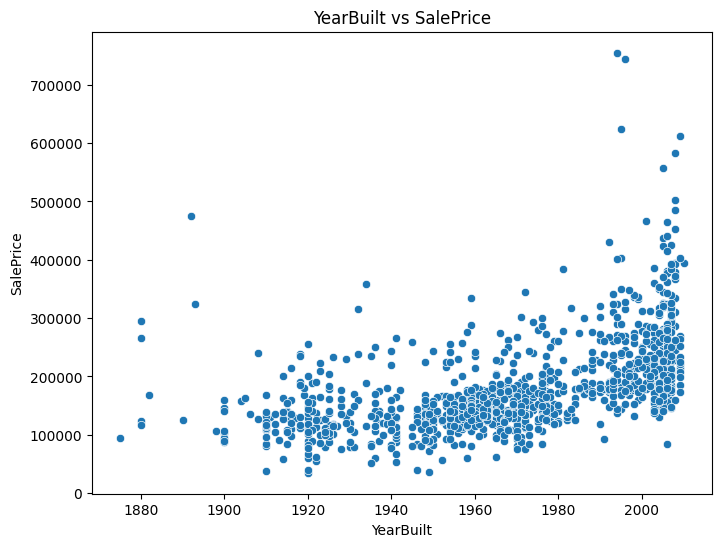

In [60]:
# Scatter plot between important numerical features and SalePrice
important_num_features = ['GrLivArea', 'TotalBsmtSF', '1stFlrSF', 'GarageArea', 'YearBuilt']

# Create scatter plots
for feature in important_num_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=housing_data[feature], y=housing_data['SalePrice'])
    plt.title(f'{feature} vs SalePrice')
    plt.show()


Categorical  features vs Sales

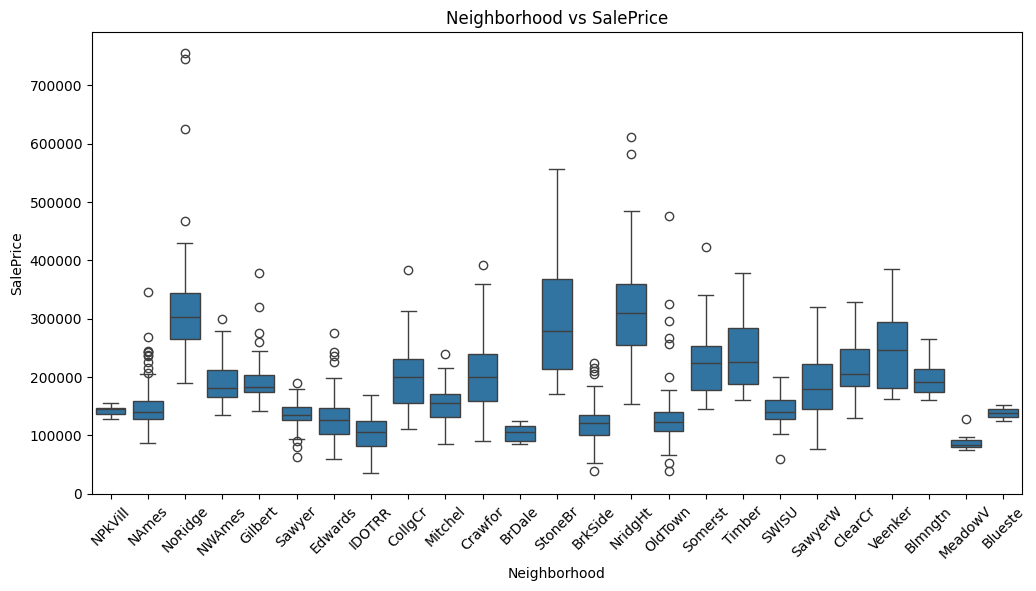

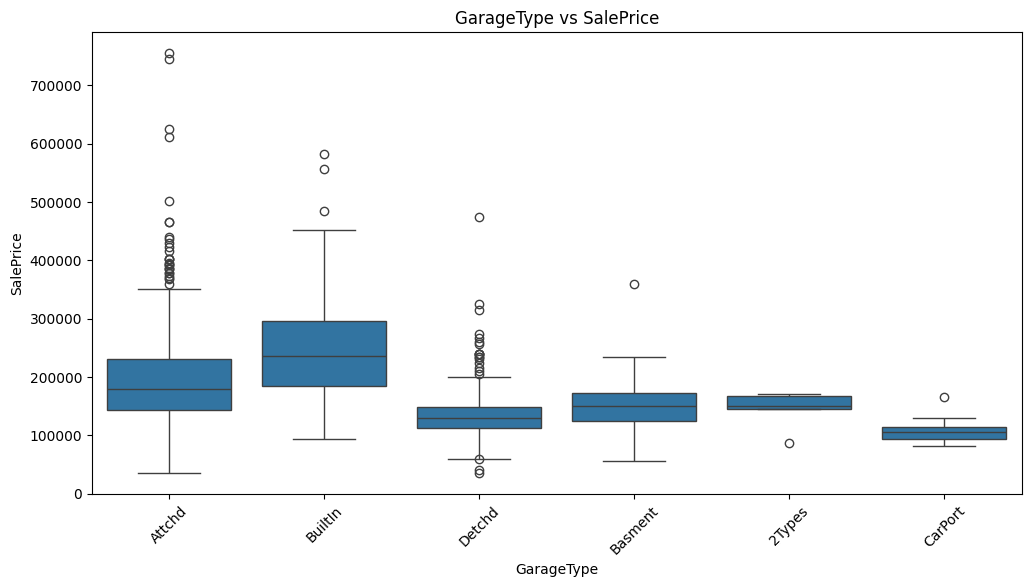

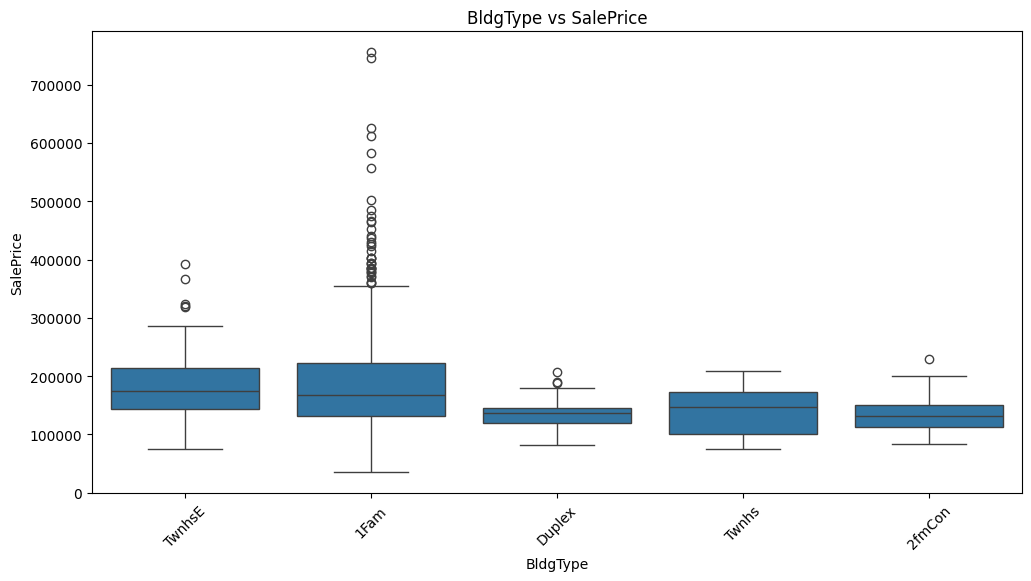

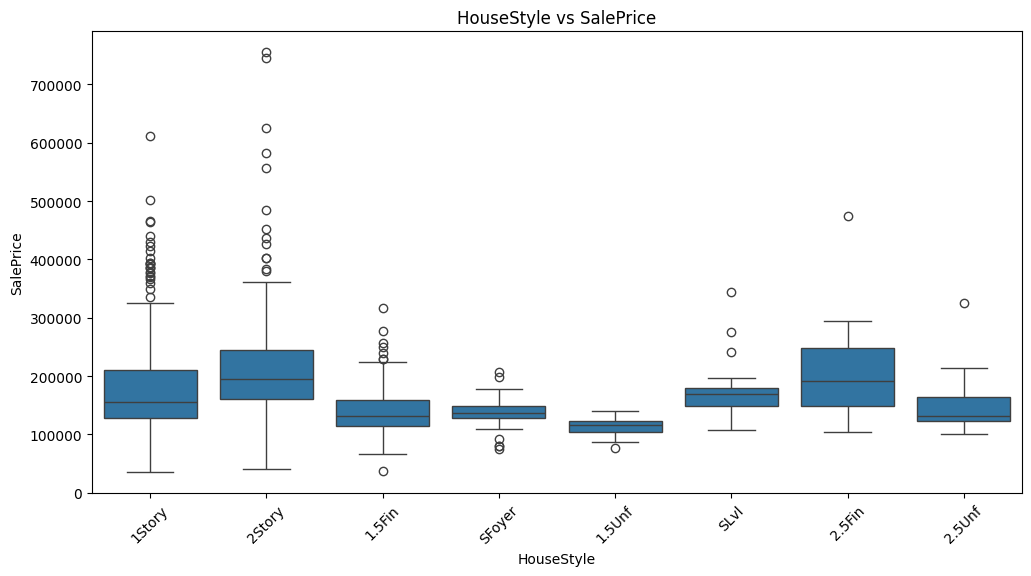

In [61]:
# Boxplot for categorical variables
categorical_features = ['Neighborhood', 'GarageType', 'BldgType', 'HouseStyle']

# Boxplots to see how different categories affect SalePrice
for feature in categorical_features:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=housing_data[feature], y=housing_data['SalePrice'])
    plt.title(f'{feature} vs SalePrice')
    plt.xticks(rotation=45)
    plt.show()


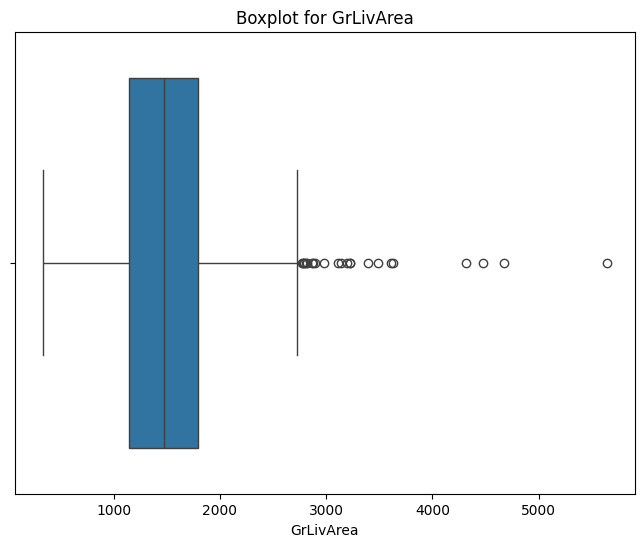

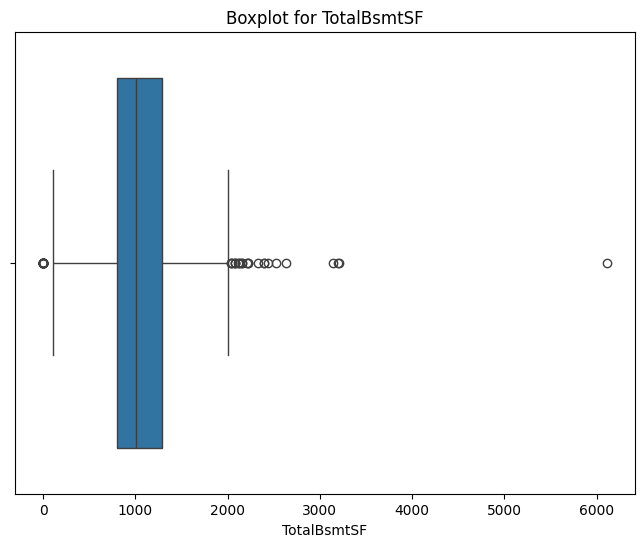

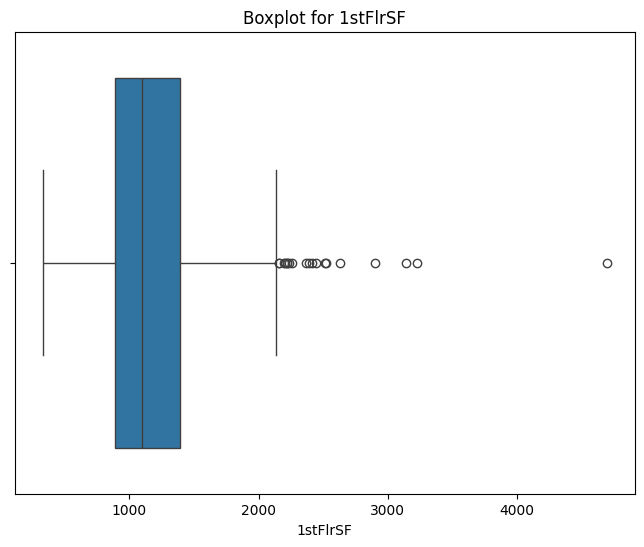

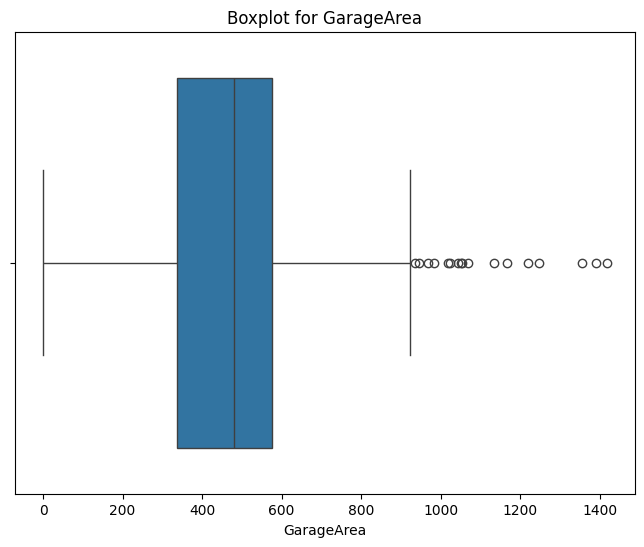

In [62]:
# Boxplot to detect outliers
important_num_features = ['GrLivArea', 'TotalBsmtSF', '1stFlrSF', 'GarageArea']

for feature in important_num_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=housing_data[feature])
    plt.title(f'Boxplot for {feature}')
    plt.show()


1167


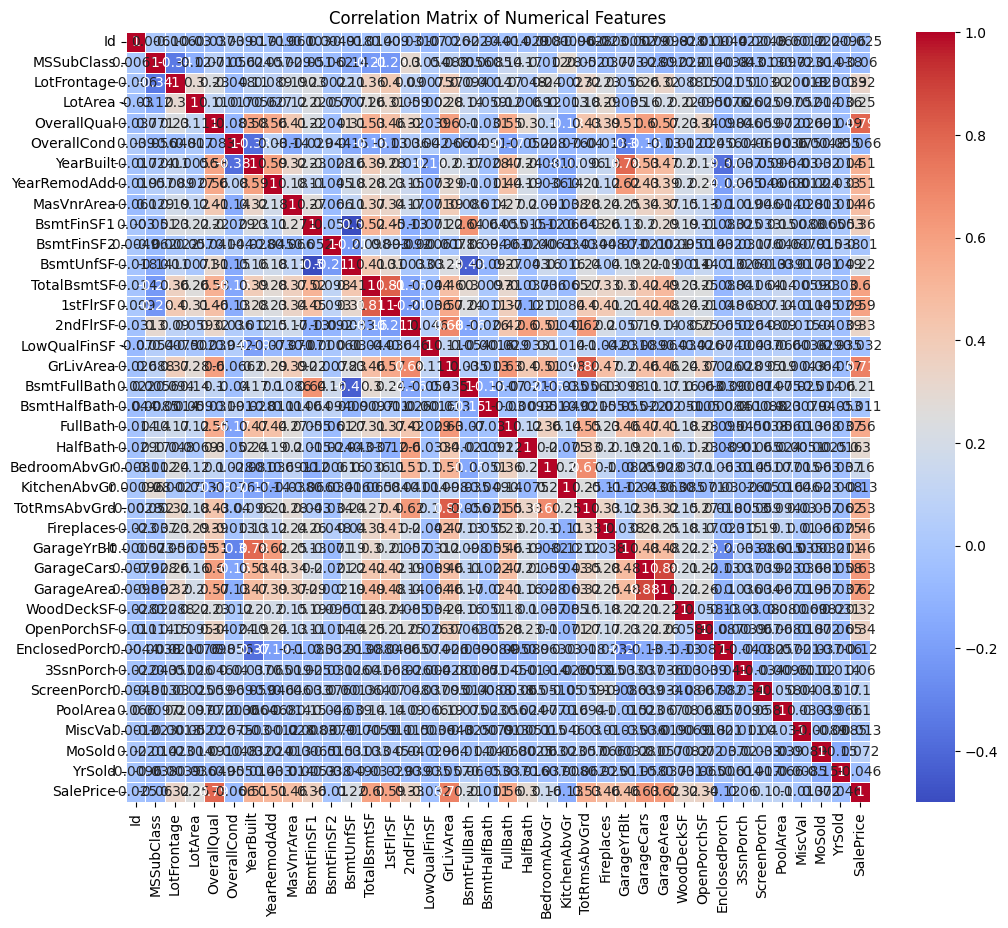

Features with correlation higher than 50% with SalePrice:
OverallQual     0.789298
GrLivArea       0.707166
GarageCars      0.628650
GarageArea      0.619029
TotalBsmtSF     0.595181
1stFlrSF        0.587517
FullBath        0.555706
TotRmsAbvGrd    0.528118
YearBuilt       0.514612
YearRemodAdd    0.507724
Name: SalePrice, dtype: float64


In [63]:
# Filter out numerical features
numerical_features = housing_data.select_dtypes(include=['float64', 'int64'])[1:]

# Compute correlation matrix for numerical features
corr_matrix = numerical_features.corr()

# Plot heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Get the correlation of all features with SalePrice
corr_with_saleprice = corr_matrix['SalePrice'].sort_values(ascending=False)

# Filter correlations greater than 50% (0.5)
high_corr_features = corr_with_saleprice[(corr_with_saleprice > 0.5) & (corr_with_saleprice < 1)]

# Display the results
print("Features with correlation higher than 50% with SalePrice:")
print(high_corr_features)

# Model Building

In [64]:
train_data = housing_data.copy()
test_data = pd.read_csv("Hosuing-project-test-data.csv")
# One-hot encoding for categorical features
train_data_encoded = pd.get_dummies(train_data, drop_first=True)
test_data_encoded = pd.get_dummies(test_data, drop_first=True)

# Align the test and train data (if some categories are missing in the test dataset)
train_data_encoded, test_data_encoded = train_data_encoded.align(test_data_encoded, join='left', axis=1)
test_data_encoded = test_data_encoded.fillna(0)  # Fill missing columns in test with 0


In [65]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np

# Separate features and target variable
X = train_data_encoded.drop('SalePrice', axis=1)
y = train_data_encoded['SalePrice']

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
linear_model = LinearRegression()
ridge_model = Ridge()
lasso_model = Lasso()

# Train the models
linear_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)

# Predict on validation set
y_pred_linear = linear_model.predict(X_val)
y_pred_ridge = ridge_model.predict(X_val)
y_pred_lasso = lasso_model.predict(X_val)

# Calculate metrics
def print_metrics(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f'{model_name} Performance:')
    print(f'MAE: {mae}')
    print(f'R2 Score: {r2}')
    print(f'RMSE: {rmse}\n')

print_metrics(y_val, y_pred_linear, 'Linear Regression')
print_metrics(y_val, y_pred_ridge, 'Ridge Regression')
print_metrics(y_val, y_pred_lasso, 'Lasso Regression')


Linear Regression Performance:
MAE: 27639.973407994246
R2 Score: 0.08469590347422962
RMSE: 79913.00830256316

Ridge Regression Performance:
MAE: 21972.935552482602
R2 Score: 0.7525206274693165
RMSE: 41553.18140283816

Lasso Regression Performance:
MAE: 27226.08058721163
R2 Score: 0.1256364342567221
RMSE: 78105.35363440134



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.400e+11, tolerance: 5.670e+08
  model = cd_fast.enet_coordinate_descent(


Since, after analysing the MAE, R2 and RMSE. Ridge Regression is the best model.


In [66]:
# Save the predictions of the Ridge model to a CSV file
ridge_predictions_df = pd.DataFrame({'SalePrice': y_pred_ridge})
ridge_predictions_df.to_csv('ridge_model_predictions.csv', index=False)
